<h1>Resolver el siguiente problema</h1>
<img src='problema_prueba_hipotesis.png'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm , expon

In [2]:
muestra = [42, 35, 29, 45, 41, 57, 54, 47, 48, 56, 47, 35, 52, 31, 52, 55, 57, 58, 26, 29, 32, 37, 32, 34, 48, 20, 48, 51, 27, 24, 39, 40, 31, 34, 23, 24, 41, 58, 44, 48, 31, 23, 27, 55, 43, 47, 30, 57, 38, 51]

In [10]:
muestra = pd.Series(muestra)
media_muestral = muestra.mean()
n = len(muestra)
alpha = 0.95

In [40]:
mu, var, skew, kurt = expon.stats(scale=30, moments='mvsk')
std = np.sqrt(var)

### Hipotesis
<ul>
    <li>$H_0 = \bar{x} <= 30s$</li>
    <li>$H_1 = \bar{x} > 30s$</li>
</ul>

In [88]:
z_1 = (30-media_muestral) /( std/np.sqrt(n))
z_1

-2.5125860958161983

In [18]:
valor_critico = norm.ppf(1-alpha)

In [90]:
data_norm = norm.rvs(size=100000)

/home/cesar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


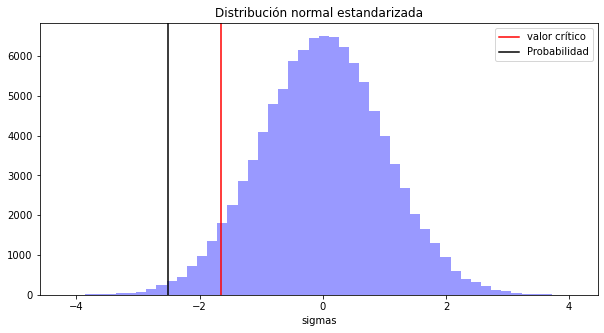

In [92]:
plt.figure(figsize=(10,5))
ax = sns.distplot(data_norm,kde=False,color='blue')
ax.set(xlabel='sigmas',title='Distribución normal estandarizada')
ax.axvline(valor_critico,color='r',label='valor crítico')
ax.axvline(z_1,color='k',label='Probabilidad')
ax.legend()
plt.show()

Al estar la línea de las z_1 dentro del valor crítico podemos descartar la variable $h_0$

# Errores estadísticos

### Error tipo 1
Probabilidad de equivocarnos al rechazar la $H_0$ cuando es la obción verdadera

In [97]:
(30-media_muestral)/(std/np.sqrt(n))

-2.5125860958161983

In [103]:
alpha = norm.cdf(-2.5125860958161983)
alpha

0.005992492844519169

### Error tipo 2
Probabilidad de equivocarnos al aceptar $H_0$ cuando esta es falsa

In [101]:
beta = 1 - norm.cdf(-2.5125860958161983)
beta

0.9940075071554808

### Potencia 
Probabilidad de equivocarnos al rechazar $H_0$ cunado esta es falsa
$$1-\beta$$

In [104]:
1 - beta

0.005992492844519193

# Intervalos de confianza
Un intervalo de confianza estimador por intervalo. Cada intervalo de confianza tiene un coeficiente denotado por (1-a) alpha, que representa la probabilidad de que el valor que yo quiero estimar este inmerso en el intervalo .

Asumiendo que tabajamos con promedios muestrales esta es la formula: $$\large\bar{X} ± Z_{a/2} \frac{\sigma}{\sqrt{n}}$$

De lo contrario: $$\large\bar{X} ± Z_{a/2}  \sigma$$

In [132]:
alpha2 = 0.90

In [133]:
interv_confianza = 1- alpha2
interv_sup = media_muestral + (alpha2*std/np.sqrt(n)) 
interv_inf = media_muestral - (alpha2*std/np.sqrt(n))
interv_inf,interv_sup

(36.84162338159264, 44.47837661840735)

In [ ]:
data_norm2 = norm.rvs(loc=media_muestral,scale=std,size=100000)

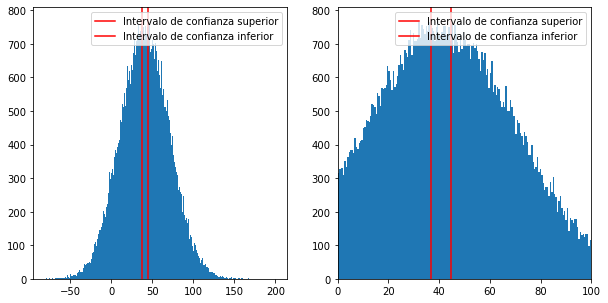

In [162]:
fig , ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist(data_norm2,bins=500)
ax[0].axvline(interv_inf,color='red',label='Intervalo de confianza superior')
ax[0].axvline(interv_sup,color='red',label='Intervalo de confianza inferior')
ax[0].legend()

ax[1].hist(data_norm2,bins=500)
plt.xlim(0,100)
ax[1].axvline(interv_inf,color='red',label='Intervalo de confianza superior')
ax[1].axvline(interv_sup,color='red',label='Intervalo de confianza inferior')
ax[1].legend()


plt.show()